In [1]:
!pip install ultralytics

^C


The ultralytics package has the YOLO class, used to create neural network models.

To get access to it, import it to your Python code:

In [ ]:
from ultralytics import YOLO

WARNING ⚠️ user config directory is not writeable, defaulting to '/tmp/Ultralytics'.


Now everything is ready to create the neural network model:

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:01<00:00, 40.1MB/s]


As I mentioned before, YOLOv8 is a group of neural network models. These models were created and trained using PyTorch and exported to files with the .pt extension.

There are three types of models and 5 models of different sizes for each type:

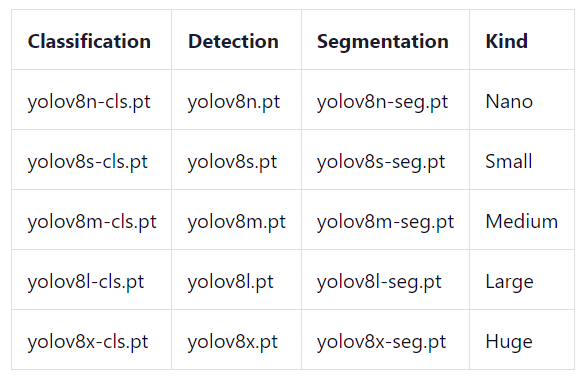

The bigger the model you choose, the better the prediction quality you can achieve, but the slower it will work.

In this tutorial I will cover object detection – which is why, in the previous code snippet, I selected the "yolov8m.pt", which is a middle-sized model for object detection.

When you run this code for the first time, it will download the **yolov8m.pt** file from the Ultralytics server to the current folder.

 Then it will construct the model object.

 Now you can train this model, detect objects, and export it to use in production.

 For all these tasks, there are convenient methods:

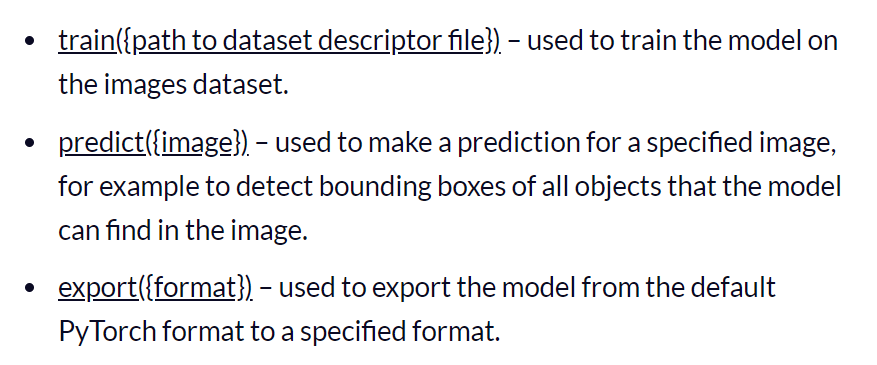

All YOLOv8 models for object detection ship already pre-trained on the COCO dataset, which is a huge collection of images of 80 different types.

So, if you do not have specific needs, then you can just run it as is, without additional training.

For example, you can download this image as "cricket.jpg":

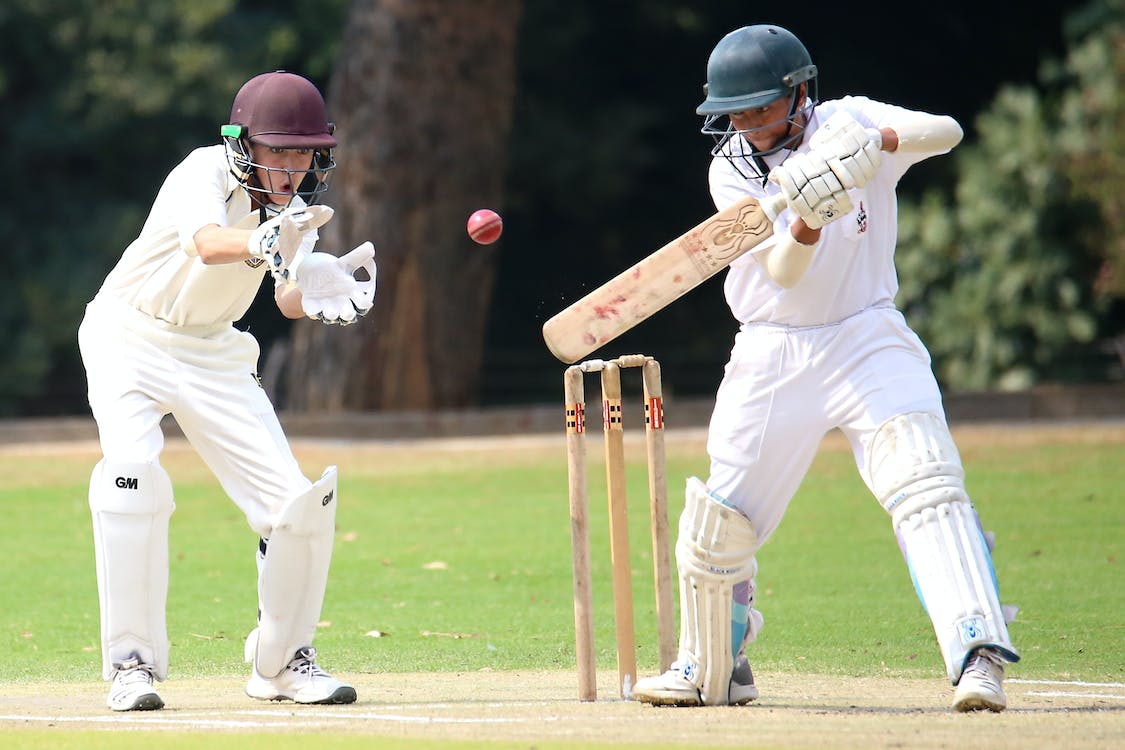

and run predict to detect all objects in it:

In [ ]:
results = model.predict("cricket.jpeg")


image 1/1 /content/cricket.jpeg: 448x640 2 persons, 1 sports ball, 1 baseball bat, 1 baseball glove, 1203.2ms
Speed: 15.1ms preprocess, 1203.2ms inference, 31.8ms postprocess per image at shape (1, 3, 640, 640)


The predict method accepts many different input types, including a path to a single image, an array of paths to images, the Image object of the well-known PIL Python library, and others.


After running the input through the model, it returns an array of results for each input image. As we provided only a single image, it returns an array with a single item that you can extract like this:

In [ ]:
result = results[0]

The result contains detected objects and convenient properties to work with them.

The most important one is the boxes array with information about detected bounding boxes on the image.

You can determine how many objects it detected by running the len function:

In [ ]:
len(result.boxes)

5

When I ran this, I got "5", which means that there are five boxes detected:

Then you can analyze each box either in a loop or manually.

Let's get the first one:

In [ ]:
box = result.boxes[0]

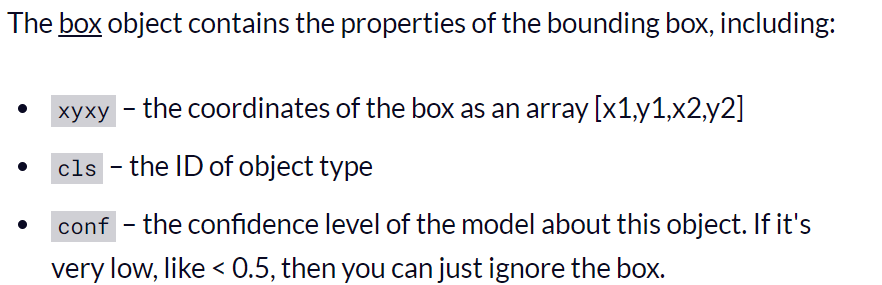

Let's print information about the detected box:

In [ ]:
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([0.])
Coordinates: tensor([[ 632.6276,   26.3612, 1022.1906,  714.4033]])
Probability: tensor([0.9476])


As I explained above, YOLOv8 contains PyTorch models. The outputs from the PyTorch models are encoded as an array of PyTorch Tensor objects, so you need to extract the first item from each of these arrays:

In [ ]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(0.)
Coordinates: tensor([ 632.6276,   26.3612, 1022.1906,  714.4033])
Probability: tensor(0.9476)


Now you see the data as Tensor objects. To unpack actual values from Tensor, you need to use the .tolist() method for tensors with array inside, as well as the .item() method for tensors with scalar values.

In [ ]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [632.6276245117188, 26.36117935180664, 1022.1905517578125, 714.4032592773438]
Probability: 0.9476009607315063


 In addition, the YOLOv8 result object contains the convenient names property to get these classes:

In [ ]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

This dictionary has everything that this model can detect. Now you can find that 0 is "person", so this bounding box is the bounding box for detected PERSON.

Let's modify the output to show results in a more representative way:

In [ ]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: person
Coordinates: [633, 26, 1022, 714]
Probability: 0.95


This data is good enough to show in the user interface.

Let's now write some code to get this information for all detected boxes in a loop:

In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: person
Coordinates: [633, 26, 1022, 714]
Probability: 0.95
---
Object type: person
Coordinates: [77, 68, 379, 712]
Probability: 0.94
---
Object type: sports ball
Coordinates: [466, 207, 503, 244]
Probability: 0.88
---
Object type: baseball bat
Coordinates: [540, 121, 891, 364]
Probability: 0.63
---
Object type: baseball glove
Coordinates: [248, 202, 335, 283]
Probability: 0.38
---


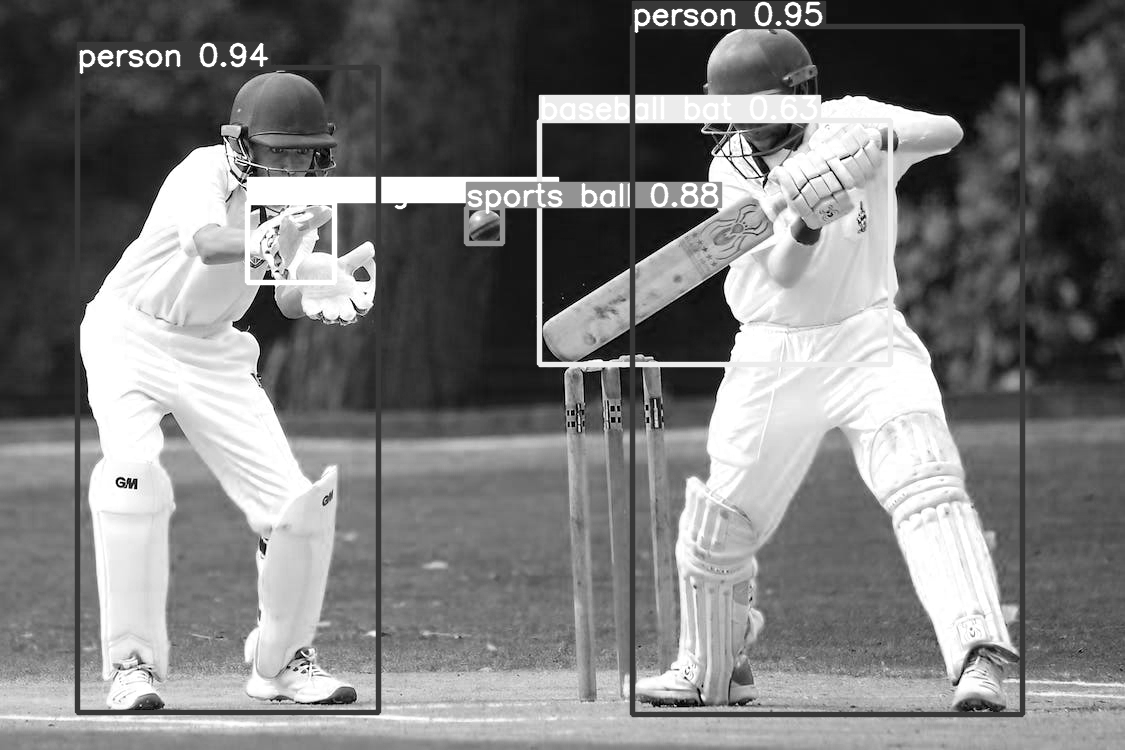

In [ ]:
from PIL import Image
import numpy as np

image_data = result.plot()[:,:,:-1]                 # Assuming result.plot() returns the image data
image = Image.fromarray(np.uint8(image_data))

image.show()

## 2 Persons , a sports ball, a baseball hat, and a baseball glove has been detected.